# DENSITY FUNCTIONAL THEORY USING PYSCF 

In this tutorial we will discuss how to perform Density Functional Theory calculations for various molecules using the PySCF library.


## Colab

This tutorial and the rest in this sequence can be done in Google colab. If you'd like to open this notebook in colab, you can use the 
following link:

https://colab.research.google.com/drive/1T5gBJs57S3MFDWT7Je_sdKjNTzniVZty?usp=sharing

## Setup 

### Installing libraries

In [65]:
! pip install pyscf 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


### Import required modules

In [66]:
import pyscf 
from pyscf import gto
from pyscf import dft
import matplotlib
import matplotlib.pyplot as plt 
import math 

## Introduction to DFT


### Uses of DFT

Density functional theory (DFT) is a type of electronic structure calculation that is becoming increasingly popular. It can be used to predict a material's crystal structure. It can also be used to calculate transport properties such as optical conductivity (such as dielectric constant), thermodynamic properties (such as specific heat). Spectroscopic properties, such as the photoemission spectra, may also be calculated using the DFT framework. 


### The many body problem 

The wave function is a useful mathematical construct for calculating the total energy of atoms and molecules, as well as other features. These Schrodinger's wave equations can be solved very easily for a single particle system, by solving the differential equations using well known methods such as the Runge Kutta method. 

However, it can be very computationally expensive to compute even for few particle systems. 

![poteq.jpg](poteq.jpg) 

This is the potential energy term of the Schodinger's equation of a many particle system. 

![kineq.jpg](kineq.jpg) 

This is the kinetic energy term of the Schodinger's equation of a many particle system.

As we can see from the equations, the summation is over all electrons and ions in the system, which would be of the order of 10^23 particles , resulting in a large number of unknown variables.
Reference: [1]

### Kohn Sham Density Functional Theory 

The first Hohenberg–Kohn theorem states that 'the ground state of any interacting many particle system with a given fixed inter-particle interaction is a unique functional of the electron density n(r)'. 

i.e  E[n(r)] where E is the ground state energy. 
(Which is where the term "Density Functional" is derived from) 

The minimization of this energy term is used to calculate the ground state energy. In order to derive the equation, we will start by looking at the basic Schrodinger's equation:
![schrodinger1.jpg](schrodinger1.jpg) 

Here,  $ \Psi $ is the wave function, H is the Hamiltonian Operator, and E is the Eigen Energy. The minimisation of this energy gives us the Ground state energy; 

![minimizationeq.jpg](minimizationeq.jpg) 

On combining the equations and the theorem we get the following equations:

![ks1.jpg](ks1.jpg) 

![ks2.jpg](ks2.jpg) 

The density function can be calculated using the following formula, where $ \Phi $ (r) is the normalized trial function:

![densityfn.jpg](densityfn.jpg)

This led to the proposition of the Hatree-Fock theorem, where in, every electron is considered as an effective single-particle moving potential; which may be respresented as:

![veff.jpg](veff.jpg)

This leads to the final derivation of the Kohn-Sham energy equation:

![KSeq1.jpg](KSeq1.jpg)

Where Exc and vxc are the 'Exchange Correlational' energy, and potential respectively. Which will be discussed in the next section of this tutorial. 

### Exchange Correlation Functional 

The exchange correlation energy approximation used in the Kohn-Sham DFT approach can be defined as the difference between the true functional and the remaining terms, and the exchange correlation potential is defined as the difference between the fermi potential and pauli potential. [Reference:5] There are a few existing Exchange correlation functionals such as the LDA and the GGA. (Read more about them from [Reference:4]) In this tutorial we are using the Perdew–Burke–Ernzerhof exchange-correlation functional. 


## Building the Molecule 

- The 'gto' command is used to initialise the molecule.
- The three numbers beside the atom determine it's coordinates in the basis system. (most calculations do not use the planar system as it yields inaccurate results)

NOTE: The basis determines the accuracy of the calculations. The number of Kohn Sham equations depends on the basis that has been chosen. If the basis chosen is more localised on the molecule, the number of equations will be less. It is similar to the concept of "data fitting" where the right initial guess equation must be chosen for a better fit. 


### The example shown below is for a water molecule 

In [67]:
mol = gto.M(
    atom = '''
    O  0.   0.       0.
    H  0.   2.       0.
    H  0.   0.       2. ''',
    basis = 'ccpvdz')

### Numerical Grids

Either rectangular or radial grids may be used depending on the problem. The examples in this tutorial use rectangular grids. An example below (where the molecule is the water molecule built above) shows the difference between two difference grids being used, just for reference.

In [68]:
method = dft.KS(mol)
print('Default DFT(LDA).  E = %.12f' % method.kernel())
method = dft.KS(mol)
method.grids.radi_method = dft.mura_knowles
print('Changed radial grids for DFT.  E = %.12f' % method.kernel())

converged SCF energy = -75.5217424548572
Default DFT(LDA).  E = -75.521742454857
converged SCF energy = -75.5217423020953
Changed radial grids for DFT.  E = -75.521742302095


## Example - Hydrogen Fluoride:

This example shows how to calculate the molecular orbital energy using the Kohn Shahm Density Functional theory. Here we are using a pre defined basis and xc functional known as the 

In [73]:
mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 1.1', 
    basis = '631g',
    symmetry = True,
)
mf = mol.KS()
mf.xc = 'pbe'
mf.kernel()
mf.analyze()

converged SCF energy = -100.291332797603
Wave-function symmetry = Coov
occupancy for each irrep:     A1  E1x  E1y
                               3    1    1
**** MO energy ****
MO #1 (A1 #1), energy= -24.2331684679437 occ= 2
MO #2 (A1 #2), energy= -1.0272973505931 occ= 2
MO #3 (A1 #3), energy= -0.426131284510634 occ= 2
MO #4 (E1x #1), energy= -0.289938626183792 occ= 2
MO #5 (E1y #1), energy= -0.289938626183793 occ= 2
MO #6 (A1 #4), energy= -0.034956037753547 occ= 0
MO #7 (A1 #5), energy= 0.664674826089051 occ= 0
MO #8 (E1x #2), energy= 1.13057079824108 occ= 0
MO #9 (E1y #2), energy= 1.13057079824107 occ= 0
MO #10 (A1 #6), energy= 1.24759794402076 occ= 0
MO #11 (A1 #7), energy= 1.57280304530478 occ= 0
 ** Mulliken atomic charges  **
charge of  0H =      0.35670
charge of  1F =     -0.35670
Dipole moment(X, Y, Z, Debye):  0.00000,  0.00000, -2.17040


((array([6.36542640e-01, 6.75369939e-03, 1.99996811e+00, 1.91722885e+00,
         3.01323431e-03, 1.99977249e+00, 1.99977249e+00, 1.43594348e+00,
         2.27508940e-04, 2.27508940e-04, 5.49982191e-04]),
  array([ 0.35670366, -0.35670366])),
 array([ 0.       ,  0.       , -2.1704032]))

## Calculating Minimum SCF Energy

In the code below, we are generating molecules based on an initial molecule wrt a given displacement (here we have chosen 0.1 Angstrom). On running DFT calculations on these molecules, we can find the bond length at which the SCF energy is the lowest; hence the molecule is more stable. 

First, we define the parameters such as the displacement: 

In [70]:
mol_a = []
cscf=[]
bondl=[]
coords = mol.atom_coords()
natoms = len(coords)
disp=0.1

The lines below generate 6N molecules around the initial molecule that we had built. (here, N=5):

In [ ]:
for k in range(5):
    for i in range(natoms):
            for x in range(3):
                new_coords_a = coords.copy()
                new_coords_a[i][x] += disp
                atoma = [[mol.atom_symbol(j), coord] for (j, coord) in zip(range(natoms), new_coords_a)]
                bondl.append(math.dist(new_coords_a[0],new_coords_a[1]))               
                mol_a.append(mol.set_geom_(atoma, inplace=False, unit='B'))
                mf = mol_a[x].KS()
                mf.xc = 'pbe0' 
                cscf.append(mf.kernel())
    disp=disp+0.1

### Results 

On plotting the Bond length in Angstrom versus the SCF Energy in eV, we can identify the bond length at which minimum energy is required. Hence making the molecule most stable at that bond length. (Under these specific periodic boundary conditions.)

TypeError: 'str' object is not callable

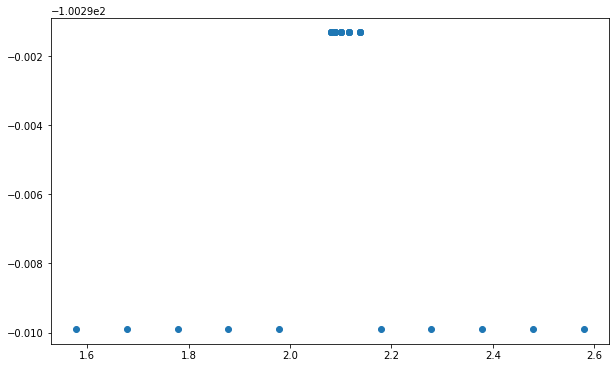

In [76]:
fig = plt.figure(figsize=(10, 6)) 
plt.scatter(bondl,cscf) 
plt.xlabel("Bond length in Angstrom")
plt.ylabel("SCF Energy in eV")
plt.show() 


As seen from the output, the lowest SCF energy is at about 1.9 Angstrom bond length. 


## Self Consistency of the Kohn Sham DFT

From this tutorial we can see, that we are able to write the ground state energy of a many particle system as a functional of electron densities. Using this density we calculate the potential energy (potentials) of the system by minimization the energy term, which in turn can be used to solve the many body Schrodinger's equations and build a new set of wave functions. This way, a many particle system is treated as several single-particle systems. Hence, the many body problem can be solved using the Density Functional Theory.

## Citations:
 - [1] Clark, S., 2012. The Many-Electron Schrödinger Equation. [online] Cmt.dur.ac.uk. Available at: <http://cmt.dur.ac.uk/sjc/thesis_mcg/node161.html> [Accessed 10 June 2022].
 - [2] Baseden, Kyle A., and Jesse W. Tye. "Introduction to density functional theory: calculations by hand on the helium atom." Journal of Chemical Education 91.12 (2014): 2116-2123.
 - [3] Jinnouchi, Ryosuke, and Ryoji Asahi. "Predicting catalytic activity of nanoparticles by a DFT-aided machine-learning algorithm." The journal of physical chemistry letters 8.17 (2017): 4279-4283.
 - [4] Kohn, Walter, and Lu Jeu Sham. "Self-consistent equations including exchange and correlation effects." Physical review 140.4A (1965): A1133.
 - [5] Paier, Joachim, et al. "The Perdew–Burke–Ernzerhof exchange-correlation functional applied to the G2-1 test set using a plane-wave basis set." The Journal of chemical physics 122.23 (2005): 234102.